In [3]:
import matplotlib.pyplot as plt
from generators.generators import *
from searchers.sequential_searchers import *

ARRAY_LENGTH = 10000
SEARCH_LENGH = 10000

In [10]:
def measure_searchers(array, search_sequence):
    array_state_threshold = array.copy()
    array_state_permutation = array.copy()
    array_state_exchange = array.copy()

    comparisons_threshold = []
    comparisons_permutation = []
    comparisons_exchange = []

    for target in search_sequence:
        comparisons_threshold.append(threshold_search(array_state_threshold, target))
        comparisons_permutation.append(permutation_search(array_state_permutation, target))
        comparisons_exchange.append(exchange_search(array_state_exchange, target))

    return comparisons_threshold, comparisons_permutation, comparisons_exchange

def plot_searchers(array, search_sequence, axis, plot_x, plot_title, step=50):
    index_measures = [i for i in range(len(search_sequence))]

    comparisons_threshold, comparisons_permutation, comparisons_exchange = measure_searchers(array, search_sequence)

    plot_indexes = [index_measures[i] for i in range(0, len(index_measures), step)]

    plot_threshold = [comparisons_threshold[i] for i in plot_indexes]
    plot_permutation = [comparisons_permutation[i] for i in plot_indexes]
    plot_exchange = [comparisons_exchange[i] for i in plot_indexes]

    axis[plot_x].plot(plot_indexes, plot_threshold, color='green', label='Threshold Search')
    axis[plot_x].plot(plot_indexes, plot_permutation, color='yellow', label='Permutation Search')
    axis[plot_x].plot(plot_indexes, plot_exchange, color='red', label='Exchange Search')
    axis[plot_x].set_xlabel('NUMBER OF SEARCH REQUESTS')
    axis[plot_x].set_ylabel('NUMBER OF COMPARISONS')
    
    axis[plot_x].set_title('\n\n\n' + plot_title)
    axis[plot_x].legend()

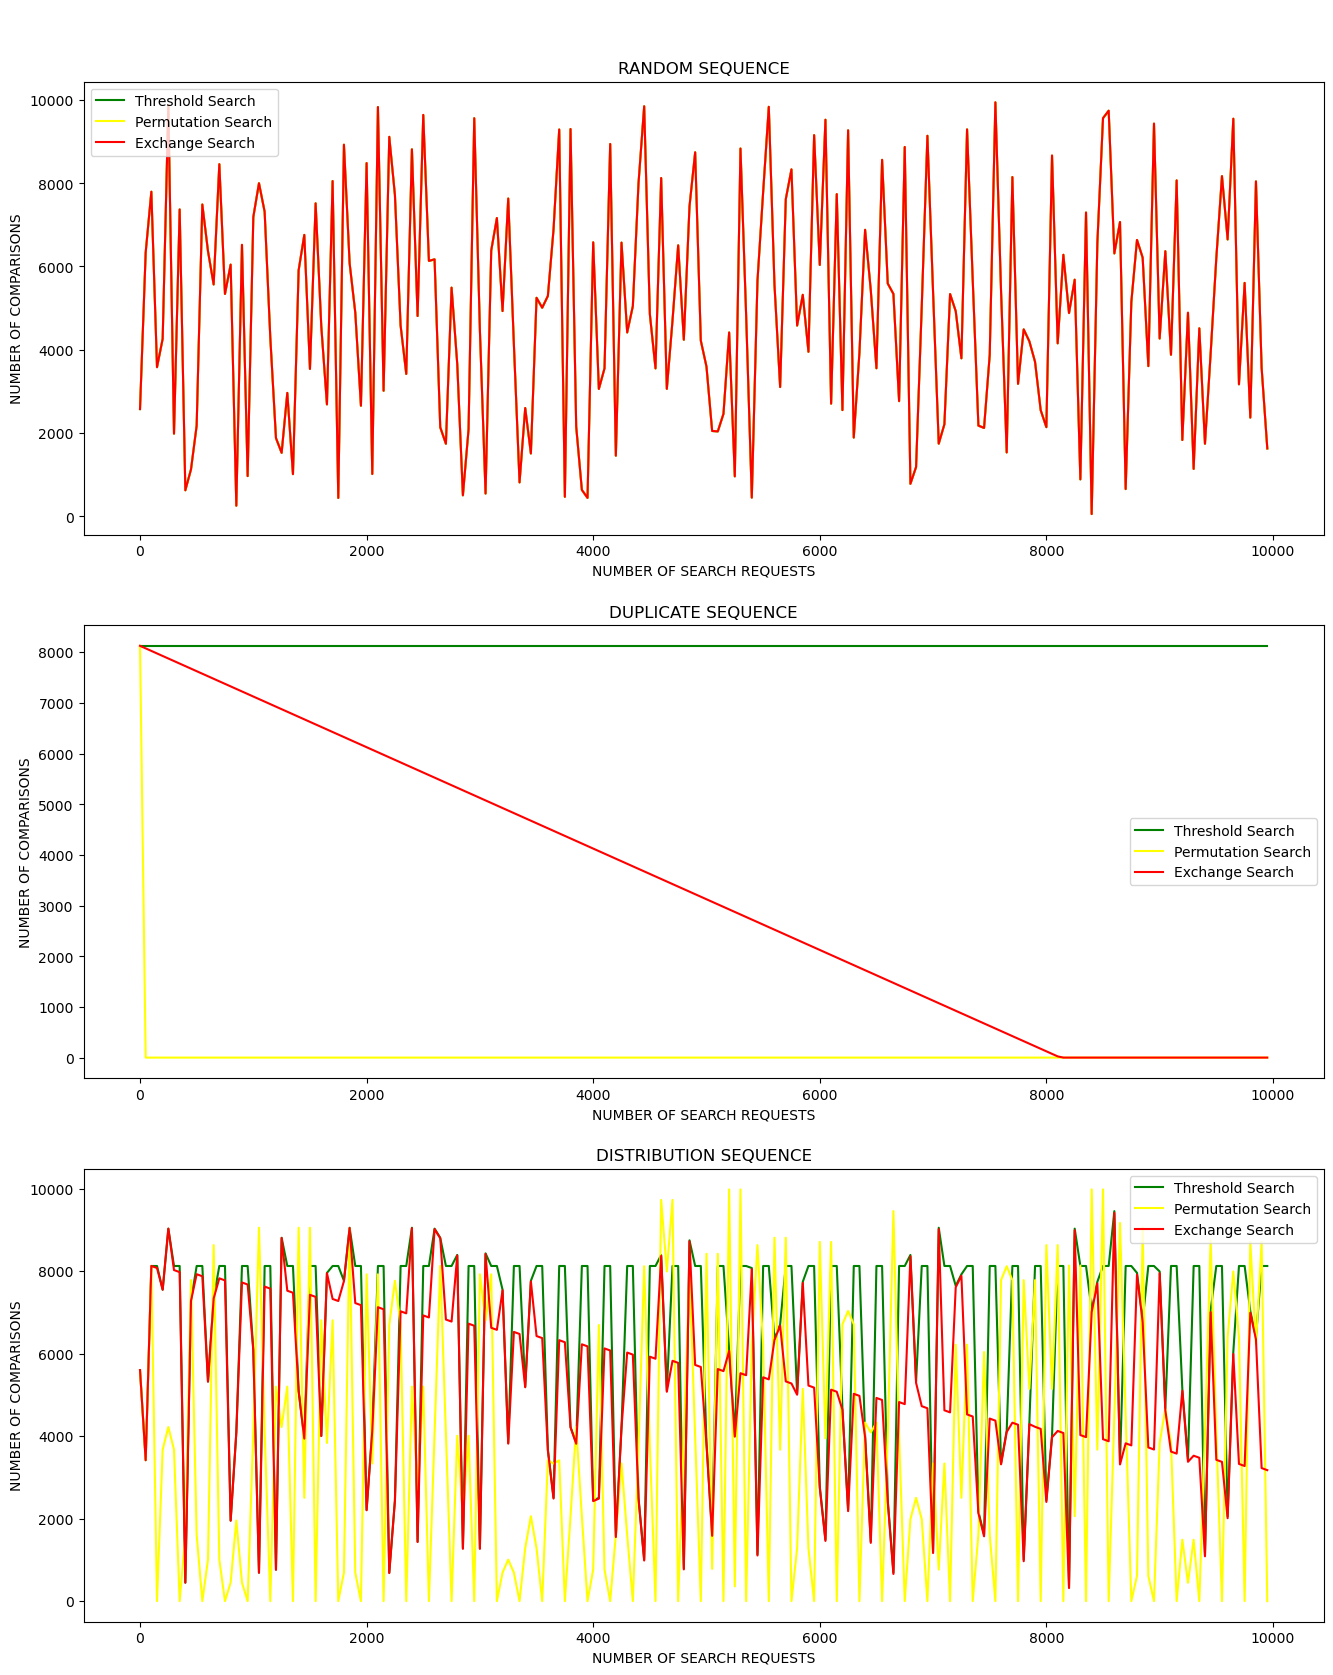

In [17]:
array = generate_random_sequence(ARRAY_LENGTH)

random_sequence = generate_random_sequence(SEARCH_LENGH)
duplicate_sequence = generate_duplicate_sequence(SEARCH_LENGH)
distribution_sequence = generate_distribution_sequence(SEARCH_LENGH)

plt.rcParams["figure.figsize"] = (16, 20)
figure, axis = plt.subplots(3, 1)

plot_searchers(array, random_sequence, axis, 0, "RANDOM SEQUENCE")
plot_searchers(array, duplicate_sequence, axis, 1, "DUPLICATE SEQUENCE")
plot_searchers(array, distribution_sequence, axis, 2, "DISTRIBUTION SEQUENCE")